# Vodafone project

This project is devoted to the vodafone music dataset. The goal of the project is to do exploratory data analysis and build machine learning model to solve business problem. 

## Preprocessing & EDA

Let's start from the basics and import necessary libraries taht will be used throughout whole work. Also connect dataset and print a glimpse of it. 
Extended info about data and columns descritpions you can check out on my kaggle account: https://www.kaggle.com/datasets/olehtsyrkun/my-set

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

file_path = r'C:\ONU EDU\ML\vodafone_music_subset.csv'

df = pd.read_csv(file_path)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Columns: 460 entries, device_type to target
dtypes: float64(452), int64(8)
memory usage: 61.4 MB
None


,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,service_8_count_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,service_9_flag_m3,target
0,7,1057,3,2.0,0,0.965306,0,153.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,48.779990,NaN,0
1,7,728,3,1.0,0,0.964468,0,354.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
2,7,896,26,1.0,0,0.646706,0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0
3,7,745,3,2.0,0,0.842123,0,252.0,1.0,22.0,...,0.0,0.0,0.0,0.0,NaN,NaN,3104.715068,2890.028280,NaN,1
4,7,69,27,1.0,1,0.988695,0,333.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.822502,41.871067,NaN,0


After deeper analysis of data we can affirm that target is a binary variable that called 'target'. Also there are a lot of missing information and useless columns. At first let's get rid of unnecessary features such as columns with same value on each row etc. This action will help in further analysis and model building.

In [3]:
col_to_drop = ['service_2_flag', 'inact_days_count', 'rr_act_type_7', 'rr_gift_type_1', 'voice_omo_in_cost_m1', 'voice_pstn_in_cost_m1', 'sms_roam_in_count_m1', 'service_8_count_m1', 'service_9_flag_m1', 'voice_omo_in_cost_m2', 'voice_pstn_in_cost_m2', 'sms_roam_in_count_m2', 'service_8_count_m2', 'service_9_flag_m2', 'voice_omo_in_cost_m3', 'voice_pstn_in_cost_m3', 'sms_roam_in_count_m3', 'service_8_count_m3', 'service_9_flag_m3']
df.drop(columns=col_to_drop, inplace=True)
df.head()

,device_type,manufacturer_category,os_category,sim_count,tp_flag,lt,block_flag,days_exp,service_1_flag,service_1_count,...,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,target
0,7,1057,3,2.0,0,0.965306,0,153.0,0.0,0.0,...,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,48.779990,0
1,7,728,3,1.0,0,0.964468,0,354.0,0.0,0.0,...,26.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
2,7,896,26,1.0,0,0.646706,0,60.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0
3,7,745,3,2.0,0,0.842123,0,252.0,1.0,22.0,...,17.0,0.0,0.0,0.0,0.0,NaN,NaN,3104.715068,2890.028280,1
4,7,69,27,1.0,1,0.988695,0,333.0,0.0,0.0,...,26.0,0.0,0.0,0.0,0.0,NaN,NaN,0.822502,41.871067,0


The next stage of preprocessing is to minimize missing values in each row. To fill the blanks we must know the types and possible range of values. Luckily after reanalysis of the dataset we see there are only missing numeric (such as count of volume< bytes and visits) and binary variables, so we can asssume that if there is no information in binary variable it will be 0 (the majority of binary features are flags) and if count info do not exist then it also = 0.  

In [4]:
df.fillna(0, inplace=True)
print(df.count())

device_type              17500
manufacturer_category    17500
os_category              17500
sim_count                17500
tp_flag                  17500
                         ...  
income_brnd_cont_m3      17500
data_type_1_m3           17500
data_type_2_m3           17500
data_type_3_m3           17500
target                   17500
Length: 441, dtype: int64


Now when dataset is far more better in terms of data fullnes and represenation, we can start some exploratory data analysis and gain important insight of our data.

EDA will be carried out on the target audience. At first let's figure out which app has the most traffic among target audience.

vol_app_5     1.475373e+12
vol_app_7     4.023083e+11
vol_app_1     2.219966e+11
vol_app_4     1.819140e+10
vol_app_6     9.990498e+09
vol_app_15    9.059373e+09
vol_app_14    7.378292e+09
vol_app_10    5.960141e+08
vol_app_12    3.786937e+08
vol_app_9     3.213533e+08
vol_app_11    2.988652e+08
vol_app_16    1.767253e+08
vol_app_3     1.537130e+08
vol_app_2     1.025849e+08
vol_app_13    8.137580e+07
vol_app_8     6.095406e+07
dtype: float64


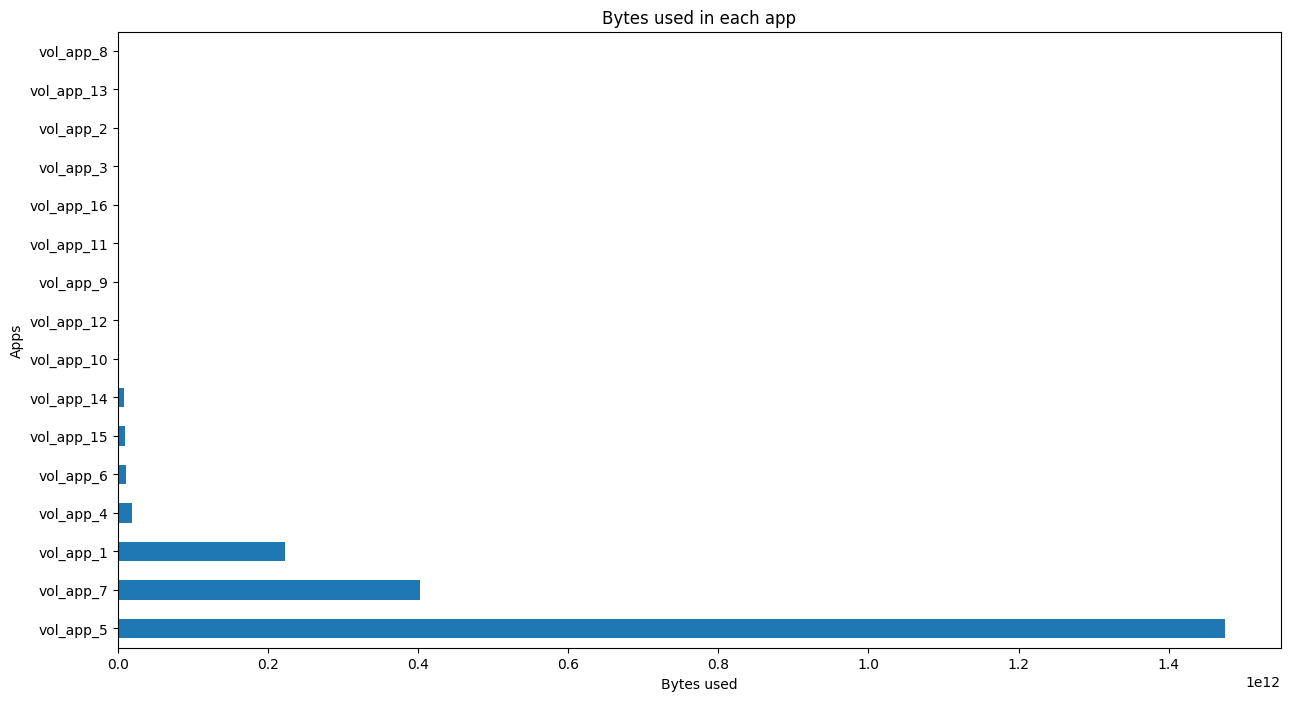

In [5]:
new_df = pd.DataFrame()
for i in range(1,17):
    new_df[f'vol_app_{i}'] = df.loc[df['target'] == 1, f'vol_app_{i}']

column_sums = new_df.sum()
column_sums = column_sums.sort_values(ascending=False)
print(column_sums)

fig, ax = plt.subplots(figsize=(15, 8))
column_sums.plot(kind='barh', ax=ax)
plt.title('Bytes used in each app')
plt.xlabel('Bytes used')
plt.ylabel('Apps')
plt.show()

As we can see according to the plot the most prefered apps are 5, 7, 1. These are YouTube, Instagram, Facebook.
The most bytes were used by users in the YouTube. The second and third is Instagram and Facebook respectively. 

The next stage of EDA will be exploring which app has the most attends among target users 

count_app_1     2089637.0
count_app_5     1773118.0
count_app_7     1656875.0
count_app_4      491892.0
count_app_6      266527.0
count_app_15      66041.0
count_app_9       27032.0
count_app_10      18574.0
count_app_14      18280.0
count_app_12      12854.0
count_app_13       8345.0
count_app_11       3797.0
count_app_2        3022.0
count_app_16       1691.0
count_app_8        1462.0
count_app_3         365.0
dtype: float64


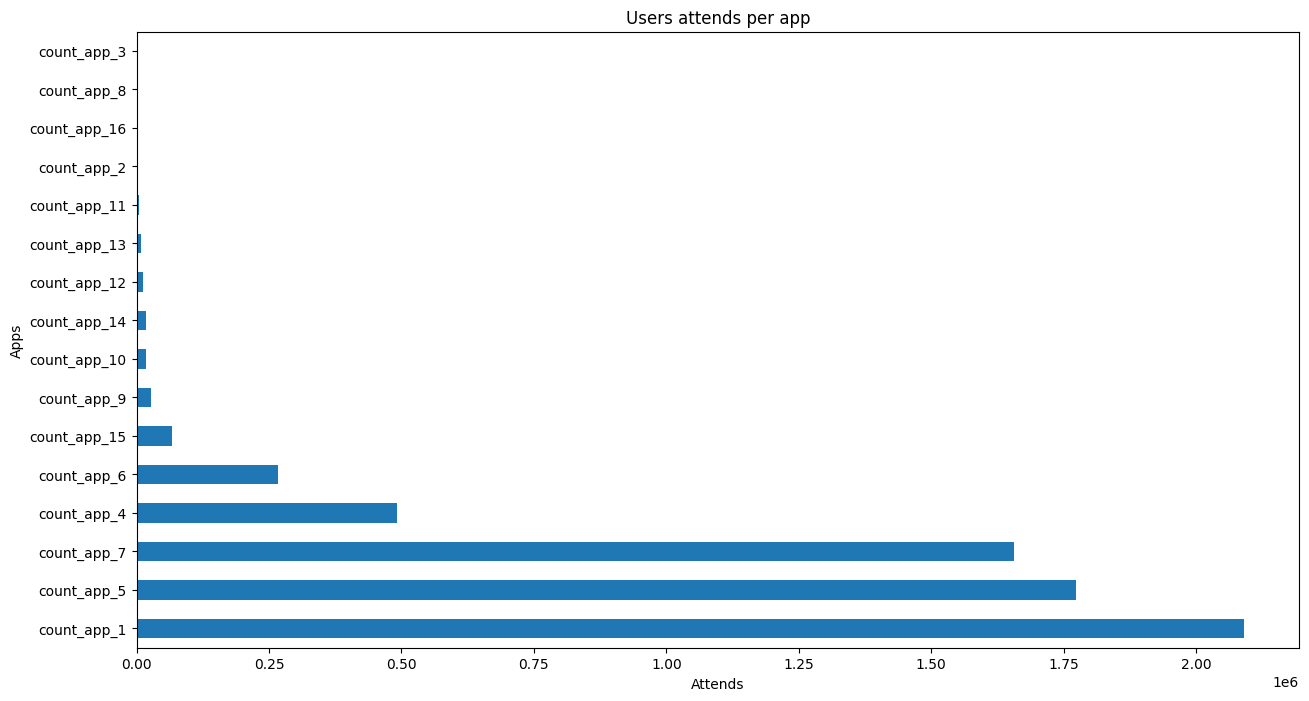

In [6]:
new_df = pd.DataFrame()
for i in range(1,17):
    new_df[f'count_app_{i}'] = df.loc[df['target'] == 1, f'count_app_{i}']

column_sums = new_df.sum()
column_sums = column_sums.sort_values(ascending=False)
print(column_sums)

fig, ax = plt.subplots(figsize=(15, 8))
column_sums.plot(kind='barh', ax=ax)
plt.title('Users attends per app')
plt.xlabel('Attends')
plt.ylabel('Apps')
plt.show()

The result shows that top 3 apps in attends the same as in the volume of bytes. But here we have that users attend Facebook more often and rating looks like Facebook, YouTube and Insatgram. 

Now let's take a look what categories of sites prefer target audience.

count_url_category_2     114294.0
count_url_category_10     96790.0
count_url_category_9      53552.0
count_url_category_3      20182.0
count_url_category_7      15648.0
count_url_category_4      14564.0
count_url_category_6      12353.0
count_url_category_8       9080.0
count_url_category_1       5668.0
count_url_category_11      3574.0
count_url_category_12      1947.0
count_url_category_15       337.0
count_url_category_13       233.0
dtype: float64


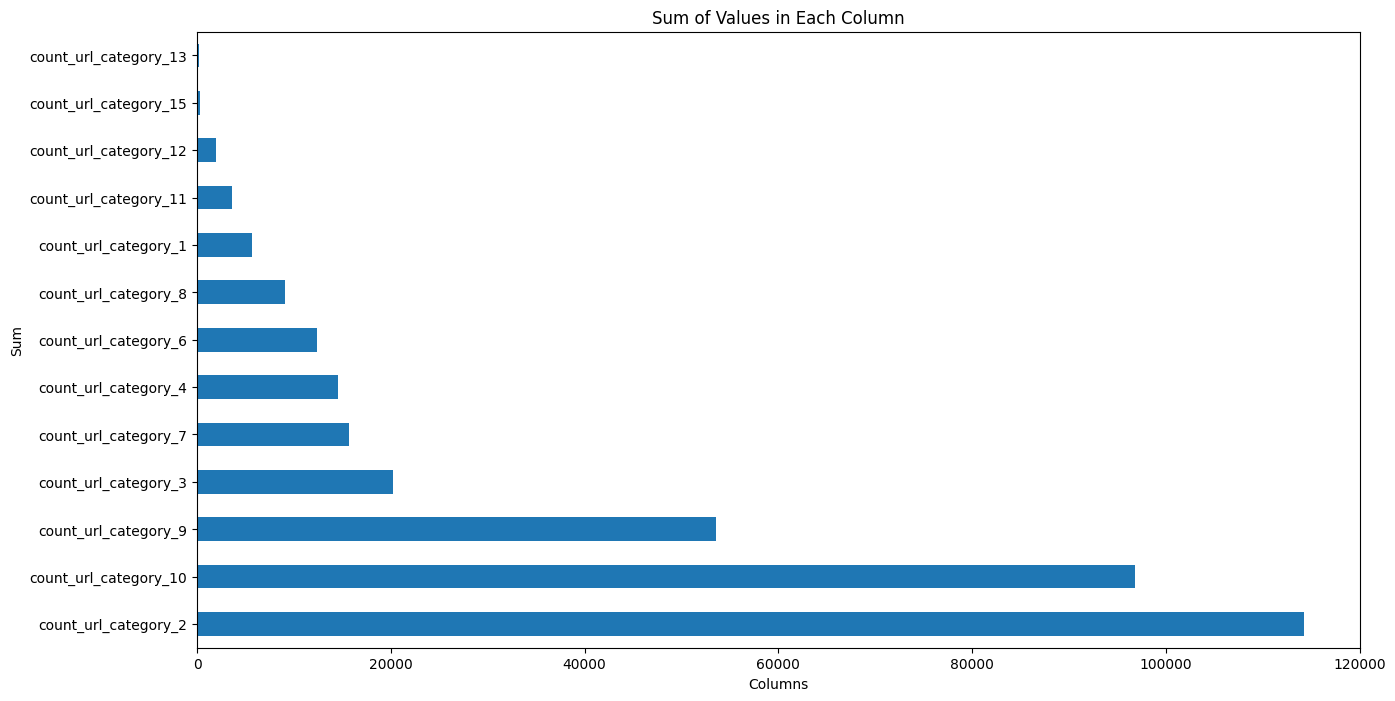

In [7]:
new_df = pd.DataFrame()
for i in range(1,16):
    if i == 5 or i == 14:
        continue
    new_df[f'count_url_category_{i}'] = df.loc[df['target'] == 1, f'count_url_category_{i}']

column_sums = new_df.sum()
column_sums = column_sums.sort_values(ascending=False)
print(column_sums)

fig, ax = plt.subplots(figsize=(15, 8))
column_sums.plot(kind='barh', ax=ax)
plt.title('Prefered site category')
plt.xlabel('Attends')
plt.ylabel('Sites')
plt.show()

According to the plot we can again determine the top 3 that stand out the most. These are hitech, leisure and info categories of sites. Thanks to the all recieved information above we can make a portrait of potential target user of the service.  

Let's deepen our target customer understanding and figure out which features influence the most with target and the most crucial.

In [8]:
feature_columns = df.drop(columns=['target']).columns.tolist()

# Linear correlation (Pearson)
linear_corr = df[feature_columns + ['target']].corr()

# Non-linear correlation (Spearman)
non_linear_corr = df[feature_columns + ['target']].corr(method='spearman')


linear_corr_dict = {}
non_linear_corr_dict = {}

# Iterate through feature_columns
for feature in feature_columns:
    # Linear correlation
    linear_corr_dict[feature] = np.round(linear_corr.loc[feature, 'target'], 4)

    # Non-linear correlation
    non_linear_corr_dict[feature] = np.round(non_linear_corr.loc[feature, 'target'],4)

linear_corr_dict = dict(sorted(linear_corr_dict.items(), key=lambda item: item[1]))
non_linear_corr_dict = dict(sorted(non_linear_corr_dict.items(), key=lambda item: item[1]))

print("Linear Correlation:")
print(linear_corr_dict)

print("\nNon-linear Correlation:")
print(non_linear_corr_dict)

Linear Correlation:
{'lt': -0.1827, 'service_P_flag_m3': -0.0639, 'service_P_flag_m2': -0.0535, 'count_sms_source_5': -0.0515, 'count_gift_type_1': -0.0511, 'is_obl_center': -0.0494, 'voice_onnet_out_day_work_dur_m3': -0.0485, 'voice_onnet_in_day_work_dur_m3': -0.0469, 'service_1_count': -0.0458, 'voice_out_uniq_count_m3': -0.0457, 'voice_onnet_out_day_work_dur_m2': -0.0451, 'voice_onnet_out_dur_m3': -0.0441, 'service_P_flag_m1': -0.044, 'voice_onnet_out_day_work_count_m3': -0.0439, 'voice_onnet_out_day_work_count_m2': -0.0423, 'count_act_type_1': -0.0414, 'os_category': -0.0411, 'voice_out_uniq_count_m2': -0.0407, 'voice_onnet_in_day_work_dur_m2': -0.0404, 'act_days_count_m3': -0.0403, 'voice_all_out_dur_m3': -0.0398, 'voice_onnet_out_count_m3': -0.0379, 'voice_onnet_in_dur_m3': -0.0374, 'voice_all_in_dur_m3': -0.037, 'voice_onnet_out_day_rest_dur_m3': -0.0365, 'voice_onnet_in_day_work_count_m3': -0.0364, 'voice_onnet_out_dur_m2': -0.0363, 'voice_onnet_out_day_work_dur_m1': -0.036, 'v

There have been used linear and non-linear correlation between features and target, but there are too many values. 
Determine the most impactful featrues:

In [9]:
most_lin_corr = {}
most_non_lin_corr = {}

for feature in feature_columns:
    # Linear correlation
    if np.abs(linear_corr_dict[feature]) >= 0.09:
        most_lin_corr[feature] = linear_corr_dict[feature]

    # Non-linear correlation
    if np.abs(non_linear_corr_dict[feature]) >= 0.09:
        most_non_lin_corr[feature] = non_linear_corr_dict[feature]

print("Highest linear correlation")  
print(most_lin_corr) 

print("Highest non-linear correlation")    
print(most_non_lin_corr) 

Highest linear correlation
{'lt': -0.1827, 'content_count_m1': 0.1331, 'content_count_m2': 0.1028, 'content_count_m3': 0.1066}
Highest non-linear correlation
{'lt': -0.19, 'balance_sum': -0.125, 'content_cost_m1': 0.1175, 'content_count_m1': 0.1126, 'income_brnd_cont_m1': 0.1294, 'content_cost_m2': 0.111, 'income_brnd_cont_m2': 0.109, 'content_cost_m3': 0.0953}


Now we can say according to the correlation results that usually target users are on a younger side and they are more likely to absorb more content on an ongoing basis. 

## Modeling

Before the start we have to clearly define the problem. Traget feature cosists of 1 and 0 which means True False, so it is 2 classes of output. Based on this information it can be stated that it is binary classification.

Now let's move on to ml model building. The first step will be taking care of hash features (manufacturer_category, device_type, os_category) because in their current form they are not representative and useful in model training. To encode this variables we will use binary encoder due to such pros : reduced dimensionality, efficient representation and memory efficiency. Also binary encoding treats all categories equally, in some cases it is con, but not in ours because of features specific nature. 

In [10]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['manufacturer_category', 'device_type', 'os_category'])
df = encoder.fit_transform(df)
df

,device_type_0,device_type_1,device_type_2,manufacturer_category_0,manufacturer_category_1,manufacturer_category_2,manufacturer_category_3,manufacturer_category_4,manufacturer_category_5,manufacturer_category_6,...,content_count_m3,service_5_count_m3,service_6_count_m3,service_7_cost_m3,service_7_flag_m3,income_brnd_cont_m3,data_type_1_m3,data_type_2_m3,data_type_3_m3,target
0,0,0,1,0,0,0,0,0,0,0,...,11.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,48.779990,0
1,0,0,1,0,0,0,0,0,0,0,...,26.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
3,0,0,1,0,0,0,0,0,0,1,...,17.0,0.0,0.0,0.0,0.0,0.0,0.000000,3104.715068,2890.028280,1
4,0,0,1,0,0,0,0,0,0,1,...,26.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.822502,41.871067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,0,0,1,0,0,0,0,0,1,0,...,46.0,0.0,0.0,0.0,0.0,0.0,0.000000,594.844666,153.834348,0
17496,0,0,1,0,0,0,0,0,0,0,...,15.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000366,0
17497,0,0,1,0,0,0,0,0,0,1,...,63.0,69.0,1.0,0.0,0.0,0.0,0.000000,97.872440,0.275499,0
17498,0,0,1,0,0,1,0,0,1,1,...,18.0,62.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0


The next step is data scaling which is crucial part for some models and overall inhances model performance. Scaling helps the algorithm reach the optimal solution more effiently.  

In [11]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_st = scaler.fit_transform(X)
X_st

array([[-0.13384808, -0.44632398,  0.4176336 , ..., -0.12773475,
        -0.33963512, -0.24377391],
       [-0.13384808, -0.44632398,  0.4176336 , ..., -0.12773475,
        -0.33963512, -0.30302408],
       [-0.13384808, -0.44632398,  0.4176336 , ..., -0.12773475,
        -0.33963512, -0.30302408],
       ...,
       [-0.13384808, -0.44632398,  0.4176336 , ..., -0.12773475,
        -0.32065461, -0.30268945],
       [-0.13384808, -0.44632398,  0.4176336 , ..., -0.12773475,
        -0.33963512, -0.30302408],
       [-0.13384808, -0.44632398,  0.4176336 , ..., -0.12525456,
         0.75625468, -0.28921914]])

One of the most important parts is to divide dataset on train and test sets  

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_st, y, test_size=0.25, random_state=42)

Before training models we have to figure out are there any issues wuth data. On preprocessing we cleaned and improved whole dataset. But there can be other problems such as class disbalance.

In [13]:
df['target'].value_counts()

target
0    16160
1     1340
Name: count, dtype: int64

Assumtions were confrimed. We have really descent class disbalace and have to cope with it because it may affect badly on model performance.

There are many ways such as deleting rows of superior class or adding synthetic data generated for missing class. But to avoid such data manipulations we will go another path and choose models for binary classification with class weight adjusment in order to level out classs disbalance.

### Logistic regression

The first model will be obvious one - regression, especially logistic (becuase of binary classification). At the beggining let's try and compare default and class balanced models.

In [14]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg_unbalanced = LogisticRegression(max_iter=1000, n_jobs=-1)
log_reg_unbalanced.fit(X_train, y_train)
y_pred = log_reg_unbalanced.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print('Unbalanced classes')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

log_reg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1)
log_reg_balanced.fit(X_train, y_train)
y_pred = log_reg_balanced.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print('Balanced classes')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Unbalanced classes
Accuracy: 0.9104
Confusion Matrix:
[[3967   47]
 [ 345   16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4014
           1       0.25      0.04      0.08       361

    accuracy                           0.91      4375
   macro avg       0.59      0.52      0.51      4375
weighted avg       0.87      0.91      0.88      4375

Balanced classes
Accuracy: 0.7414857142857143
Confusion Matrix:
[[3016  998]
 [ 133  228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      4014
           1       0.19      0.63      0.29       361

    accuracy                           0.74      4375
   macro avg       0.57      0.69      0.56      4375
weighted avg       0.89      0.74      0.80      4375



As we can see unbalanced model gives better scoring, but we have very little % of true positive in our confison matrix. The maximization of true positive is one of the key aspects in this work, but on the other hand there is balanced model that gives good results on true positive. But in balanced model raises another problem such as increased number of false negative. 
Let's try to improve our balanced model because it is more suitable in our case. 

#### Regularizations & Hyperparameters tuning

In [16]:
print('Weighted F1 scores:')
l1_reg = LogisticRegression(max_iter=1000, penalty="l1",class_weight='balanced', solver = "liblinear", n_jobs=-1)
l1_reg.fit(X_train, y_train)
y_pred = l1_reg.predict(X_valid)
print('l1:', f1_score(y_valid, y_pred, average = "weighted"))

l2_reg = LogisticRegression(max_iter=1000, penalty="l2",class_weight='balanced', solver = "lbfgs", n_jobs=-1)
l2_reg.fit(X_train, y_train)
y_pred = l2_reg.predict(X_valid)
print('l2:', f1_score(y_valid, y_pred, average = "weighted"))

elnet_reg = LogisticRegression(max_iter=1000, penalty="elasticnet",class_weight='balanced', solver = "saga", l1_ratio=0.5, n_jobs=-1)
elnet_reg.fit(X_train, y_train)
y_pred = elnet_reg.predict(X_valid)
print('elasticnet:', f1_score(y_valid, y_pred, average = "weighted"))

Weighted F1 scores:


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


l1: 0.7961318058496409
l2: 0.7963287576218429
elasticnet: 0.7960997580461846


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


As we can see the regularizations have approximately same result, so further hyperparameters tuning wiil be with default (l2) regularization.

In [17]:
params = {'C': np.logspace(-3, 3, 7), 'class_weight':['balanced']}

l2reg_grid = GridSearchCV(l2_reg, params, cv=5, scoring='f1_weighted', n_jobs=-1)
l2reg_grid.fit(X_train, y_train)

print(f'Best params: {l2reg_grid.best_params_}')
print(f'f1_weighted score: {l2reg_grid.best_score_}')

best_rf_model = l2reg_grid.best_estimator_

y_pred = best_rf_model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred)

print(f"Confusion Matrix:\n{cm}")

{'C': 1.0, 'class_weight': 'balanced'}
0.7942146092622615
Confusion Matrix:
[[3016  998]
 [ 133  228]]


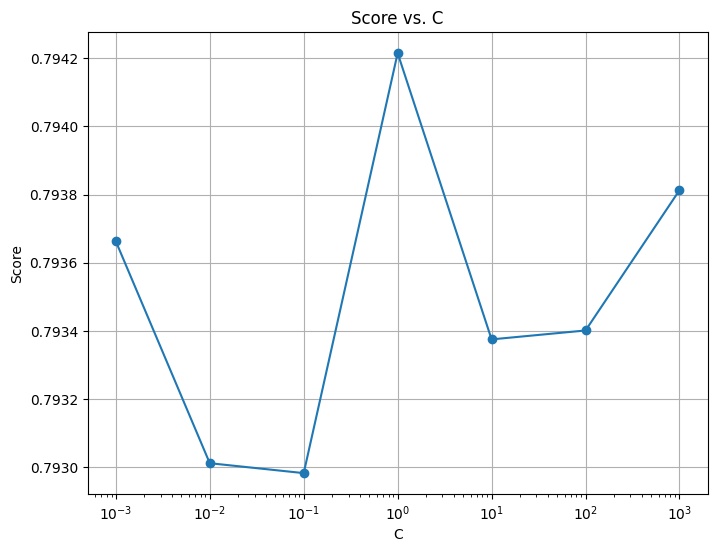

In [21]:
param_values = l2reg_grid.cv_results_[f'param_C'].data
accuracy_scores = l2reg_grid.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.plot(param_values, accuracy_scores, marker='o')

plt.xscale('log')
plt.title(f'Score vs. C')
plt.xlabel('C value')
plt.ylabel('F1 score')
plt.grid(True)
plt.show()


Result show us that default setting were already optimal. So this model has good results on cross-validation and true positive is predicted well. Misclassification of class 0 to 1 is lower than 25%.

### Support Vector Classification

Second model will be more complicated - support vector machines. This method has pros such as class weight and kernel trick. Overall method idea a bit similar with regression but svm is more adjustable and has magic kernel trick that can cope with multidimensional space.
At first build default model only with class weight balance to avoid dataset problem of target disbalance as we did it higher.

In [22]:
from sklearn.svm import SVC

svc_classifier = SVC(class_weight='balanced', random_state=42)

svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.8100571428571428
Confusion Matrix:
[[3347  667]
 [ 164  197]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      4014
           1       0.23      0.55      0.32       361

    accuracy                           0.81      4375
   macro avg       0.59      0.69      0.61      4375
weighted avg       0.89      0.81      0.84      4375



According to classification report this default model works better than regression with optimal parameters. That is a good sign so the next step will be parameters tuning.

#### Hyperparameters tuning

In [23]:
params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'class_weight':['balanced']}

svc_grid = GridSearchCV(svc_classifier, params, cv=5, scoring='f1_weighted', n_jobs=-1)
svc_grid.fit(X_train, y_train)

print(f'Best params: {svc_grid.best_params_}')
print(f'f1 score: {svc_grid.best_score_}')

Best params: {'class_weight': 'balanced', 'kernel': 'poly'}
f1 score: 0.8726154004820783


In [24]:
params = {'gamma':['scale', 'auto', 0.001, 0.01, 0.1], 'kernel':['poly'], 'class_weight':['balanced']}

svc_grid = GridSearchCV(svc_classifier, params, cv=5, scoring='f1_weighted', n_jobs=-1)
svc_grid.fit(X_train, y_train)

print(f'Best params: {svc_grid.best_params_}')
print(f'f1 score: {svc_grid.best_score_}')

best_rf_model = svc_grid.best_estimator_

y_pred = best_rf_model.predict(X_valid)

cm = confusion_matrix(y_valid, y_pred)

print(f"Confusion Matrix:\n{cm}")

{'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'poly'}
0.888811331476757
Confusion Matrix:
[[3947   67]
 [ 349   12]]


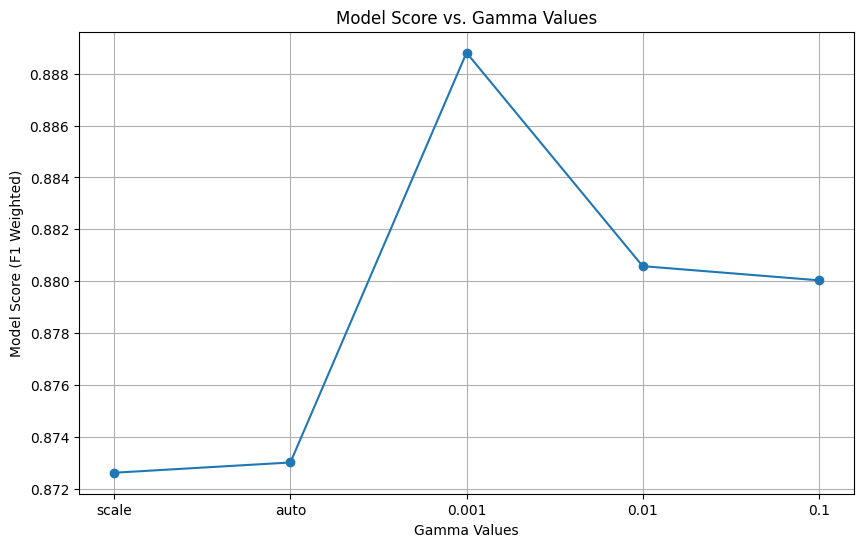

In [25]:
gamma_values = params['gamma']
scores = svc_grid.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(gamma_values, scores, marker='o')
plt.title('Model Score vs. Gamma Values')
plt.xlabel('Gamma Values')
plt.ylabel('Model Score (F1 Weighted)')
plt.grid(True)
plt.show()

As a result more complicated and adjustable SVM model gave descent results in accuracy of prediction and confusion matrix. You can even decide which confusion matrix is more acceptable for you and choose proper kernel with tuning gamma value if necesssary.

### Random forest

Last but not least model in this research will be tree-based bagging ensemble model. This model also has class weight as previous, bur also there are many other hyperparams that may help to achieve the best results.
Starting as usual with default settings and balanced class weight.

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)


accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9177142857142857
Confusion Matrix:
[[4014    0]
 [ 360    1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4014
           1       1.00      0.00      0.01       361

    accuracy                           0.92      4375
   macro avg       0.96      0.50      0.48      4375
weighted avg       0.92      0.92      0.88      4375



It is clear when you see confusion matrix that random forest results are the worst by far. But due to vide variety of adjustable parameters this could be changed.

#### Hyperparameters tuning

Best params: {'class_weight': 'balanced', 'n_estimators': 50}
f1 score: 0.8904916698689025
Confusion Matrix:
[[4014    0]
 [ 361    0]]


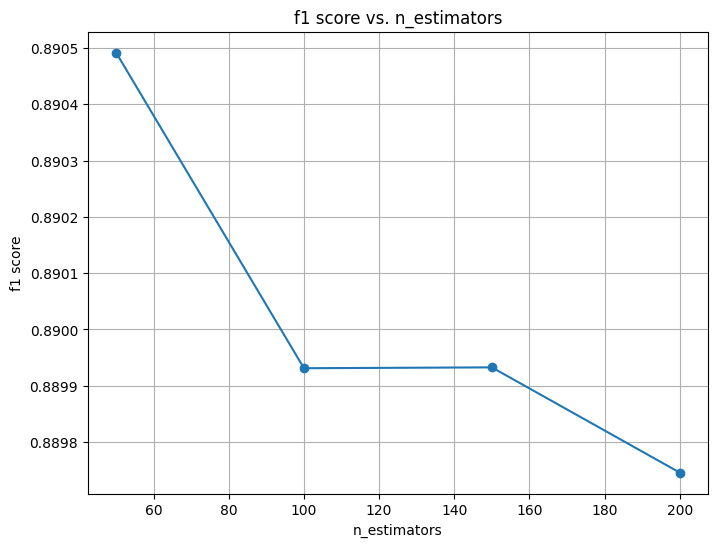

Best params: {'class_weight': 'balanced', 'min_samples_split': 17}
f1 score: 0.8937360494717916
Confusion Matrix:
[[4005    9]
 [ 356    5]]


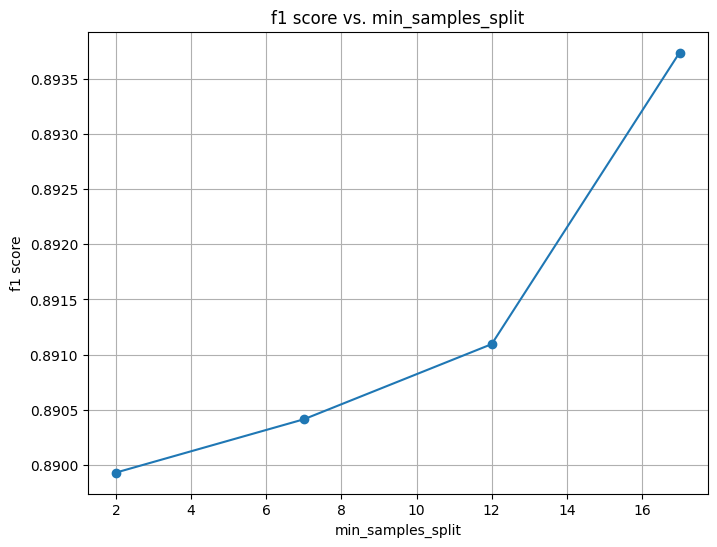

Best params: {'class_weight': 'balanced', 'min_samples_leaf': 11}
f1 score: 0.9016687561191847
Confusion Matrix:
[[3946   68]
 [ 315   46]]


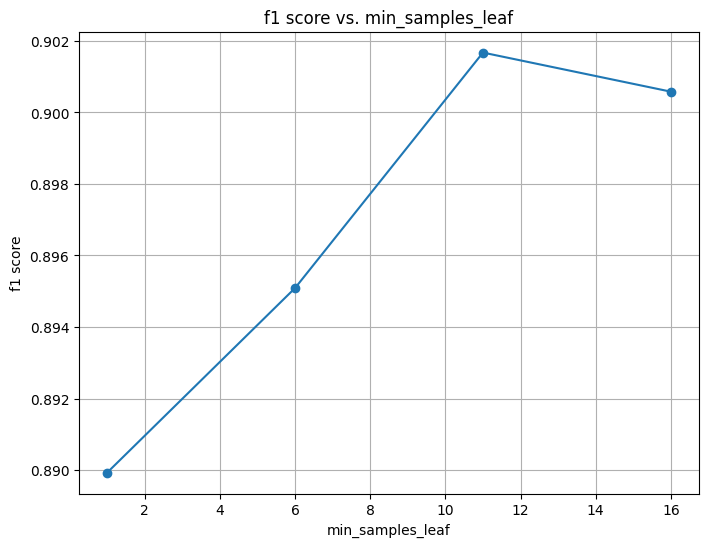

Best params: {'class_weight': 'balanced', 'max_features': 1}
f1 score: 0.8895591118981272
Confusion Matrix:
[[4014    0]
 [ 361    0]]


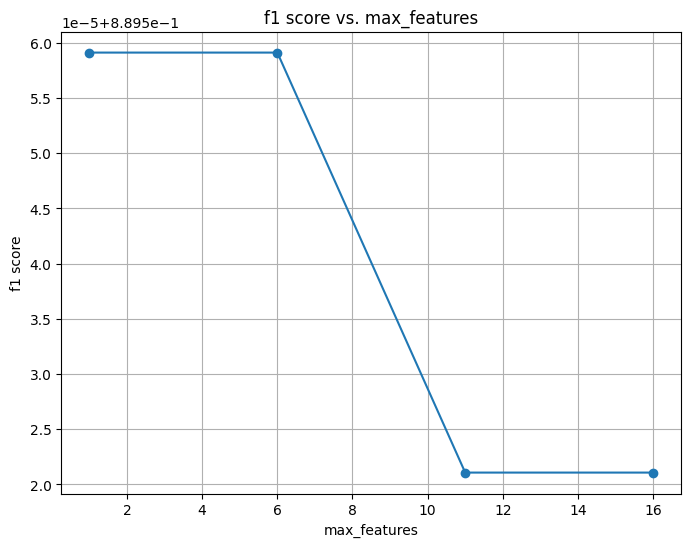

Best params: {'class_weight': 'balanced', 'max_depth': 11}
f1 score: 0.8966089128974781
Confusion Matrix:
[[3941   73]
 [ 315   46]]


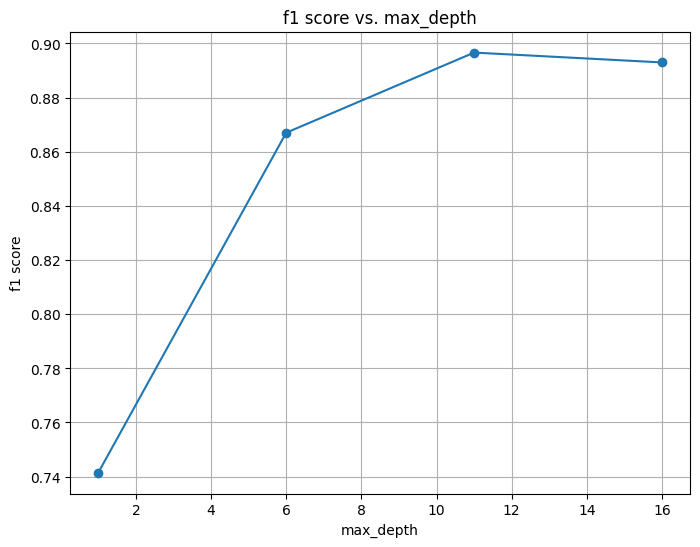

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

def rf_hyper_adjust(param_name:str, range_start:int, range_end:int, step=1):

    rf_params = {param_name: np.arange(range_start, range_end, step), 'class_weight':['balanced']}

    rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)
    rf_grid.fit(X_train, y_train)

    print(f'Best params: {rf_grid.best_params_}')
    print(f'f1 score: {rf_grid.best_score_}')

    best_rf_model = rf_grid.best_estimator_

    y_pred = best_rf_model.predict(X_valid)

    cm = confusion_matrix(y_valid, y_pred)

    print(f"Confusion Matrix:\n{cm}")

    param_values = rf_grid.cv_results_[f'param_{param_name}'].data
    accuracy_scores = rf_grid.cv_results_['mean_test_score']

    plt.figure(figsize=(8, 6))
    plt.plot(param_values, accuracy_scores, marker='o')
    plt.title(f'f1 score vs. {param_name}')
    plt.xlabel(f'{param_name}')
    plt.ylabel('f1 score')
    plt.grid(True)
    plt.show()

rf_hyper_adjust('n_estimators',50,201,50)
rf_hyper_adjust('min_samples_split', 2, 21, 5)
rf_hyper_adjust('min_samples_leaf', 1, 21, 5)
rf_hyper_adjust('max_features', 1, 21, 5)
rf_hyper_adjust('max_depth', 1, 21, 5)

Finally these results prove that randomforest is very powerful model while parameters are tuned. It may show even better results if all hyperparams were tuned simultaneously, but unfortunately i do not have such computational resources, so it can be both a plus and minus at the same time. You may achieve better result, but you need very decent computing power to gain results in reasonable time. 

## Conclusion
To sum up this research i can say that all models gave decent results, nevertheless all of them are not 100% accurate having their own pros and cons, so to solve the business problem there can be used even all three and result will be something average between them to predict approximate number of people in target group. 

But if we have to pick and determine the one best model, in my opinion it was SVM. Support vector classifier turned out to be in moderation adjustable, efficient and reasonably fast. SVM can be called the golden mean among the considered models.